# Install the Required Libraries

In [3]:
!pip install tensorflow scikit-learn

In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

#Exploratory Data Analysis (EDA)

In [5]:
file_path = 'Alphabets_data.csv'  # Update with the correct path to your dataset
data = pd.read_csv(file_path)
data

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3       5      1     8    13      0      6   
1          I     5    12      3       7      2    10     5      5      4   
2          D     4    11      6       8      6    10     6      2      6   
3          N     7    11      6       6      3     5     9      4      6   
4          G     2     1      3       1      1     8     6      6      6   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19995      D     2     2      3       3      2     7     7      7      6   
19996      C     7    10      8       8      4     4     8      6      9   
19997      T     6     9      6       7      5     6    11      3      7   
19998      S     2     3      4       2      1     8     7      2      6   
19999      A     4     9      6       6      2     9     5      3      1   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          6      10       8      0       8      0       8  
1         13       3       9      2       8      4      10  
2         10       3       7      3       7      3       9  
3          4       4      10      6      10      2       8  
4          6       5       9      1       7      5      10  
...      ...     ...     ...    ...     ...    ...     ...  
19995      6       6       4      2       8      3       7  
19996     12       9      13      2       9      3       7  
19997     11       9       5      2      12      2       4  
19998     10       6       8      1       9      5       8  
19999      8       1       8      2       7      2       8  

[20000 rows x 17 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
data.describe()

xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

            x2ybar        xy2bar         xedge        xedgey         yedge  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

            yedgex  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

In [8]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [9]:
data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [31]:
data.duplicated().sum()

1332

In [32]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

# Data Visualization

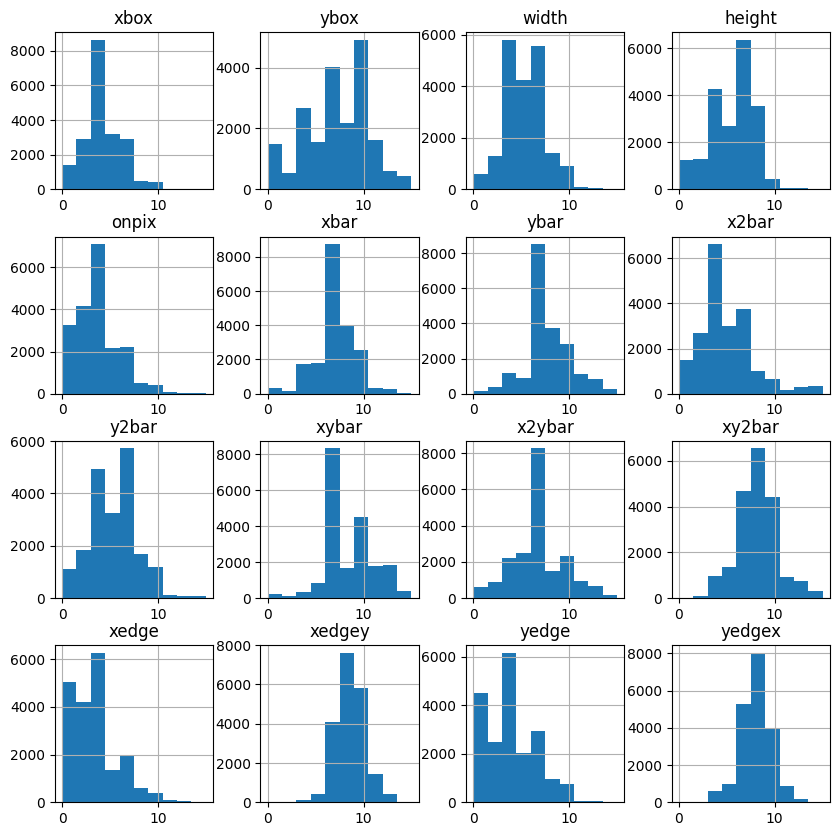

In [10]:
data.hist(figsize=(10,10))
plt.show()

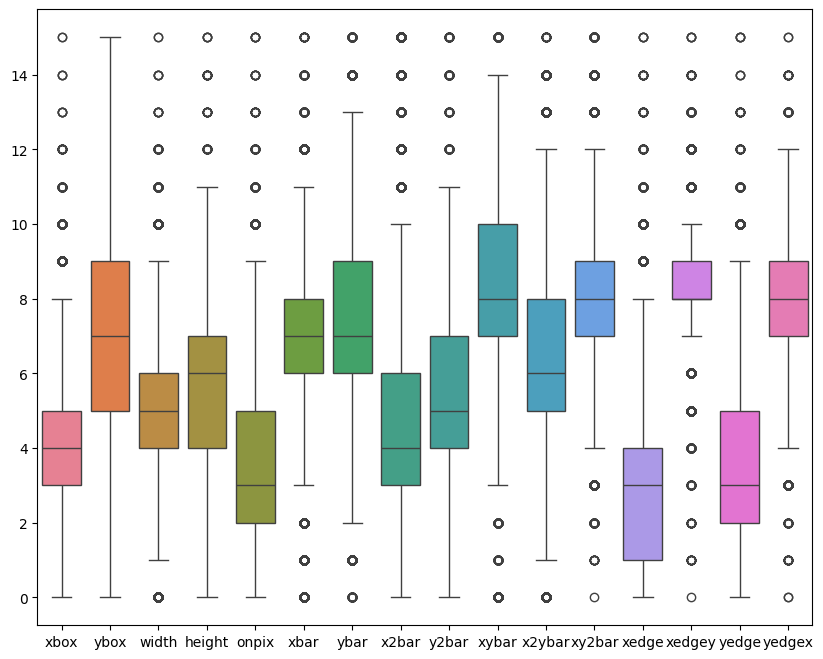

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.show()

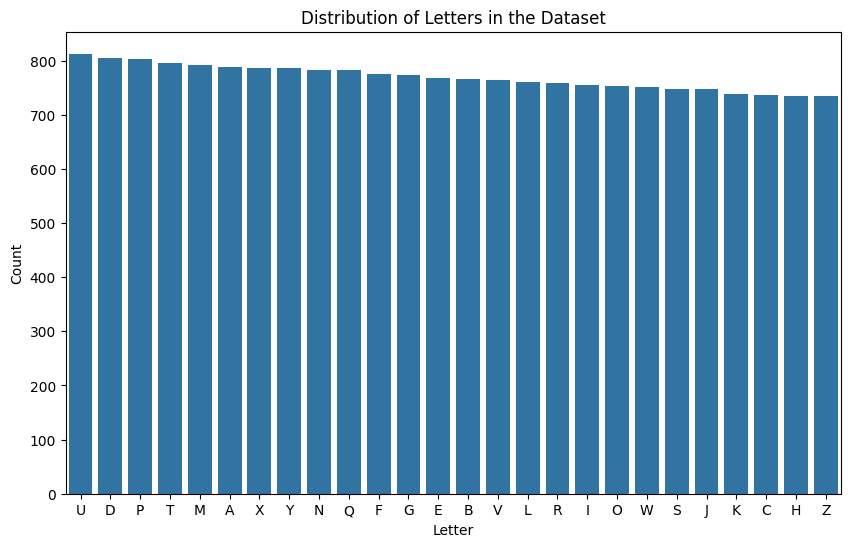

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='letter', data=data, order=data['letter'].value_counts().index)
plt.title('Distribution of Letters in the Dataset')
plt.xlabel('Letter')
plt.ylabel('Count')
plt.show()

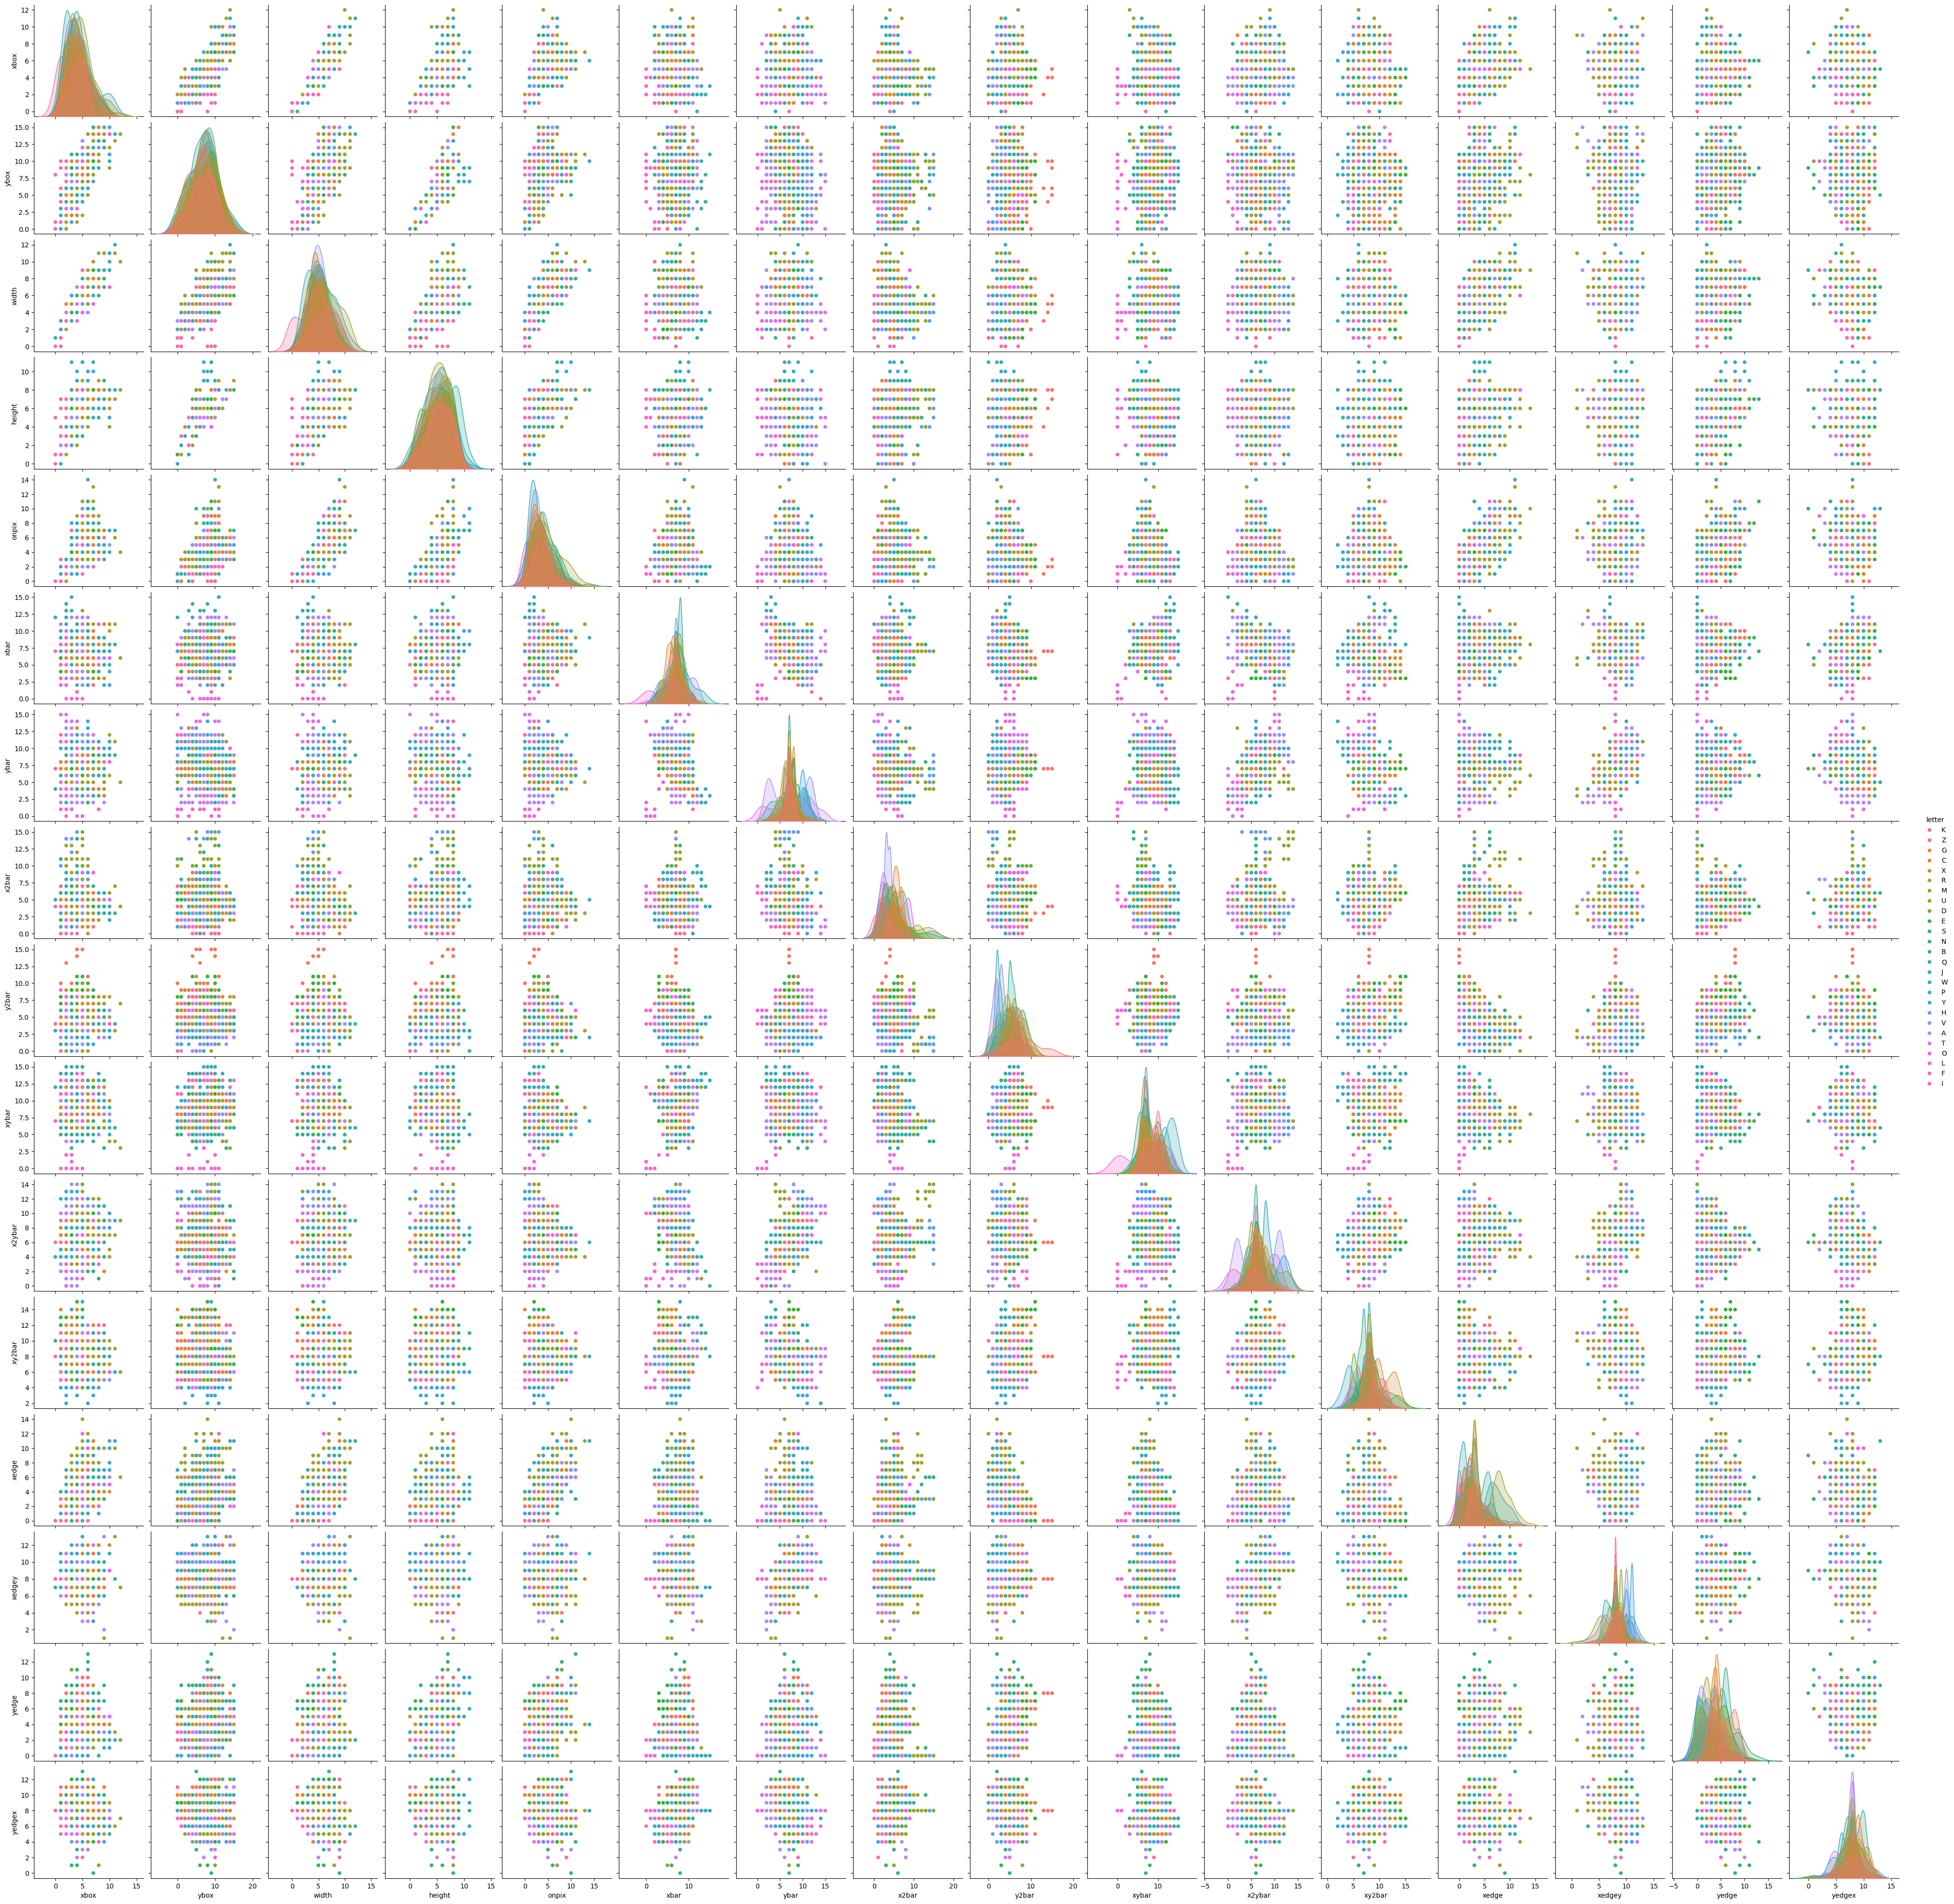

In [28]:
sns.pairplot(data.sample(1000), hue='letter')
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Data Exploration and Preprocessing

In [12]:
X = data.drop('letter', axis=1)
y = data['letter']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Model Implementation

In [17]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3401 - loss: 2.4343 - val_accuracy: 0.7212 - val_loss: 1.0332
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7372 - loss: 0.9198 - val_accuracy: 0.7872 - val_loss: 0.7532
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8071 - loss: 0.6663 - val_accuracy: 0.8153 - val_loss: 0.6378
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8347 - loss: 0.5701 - val_accuracy: 0.8419 - val_loss: 0.5309
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8614 - loss: 0.4907 - val_accuracy: 0.8616 - val_loss: 0.4809
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8739 - loss: 0.4327 - val_accuracy: 0.8703 - val_loss: 0.4378
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8863 - loss: 0.3862 - val_accuracy: 0.8775 - val_loss: 0.4025
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8926 - loss: 0.3581 - val_accuracy: 0

In [20]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [21]:
report = classification_report(y_test_classes, y_pred_classes, target_names=encoder.classes_)
print(report)

              precision    recall  f1-score   support

           A       0.96      0.99      0.97       149
           B       0.86      0.92      0.89       153
           C       0.94      0.91      0.93       137
           D       0.93      0.88      0.90       156
           E       0.85      0.96      0.90       141
           F       0.93      0.93      0.93       140
           G       0.95      0.87      0.91       160
           H       0.82      0.84      0.83       144
           I       1.00      0.88      0.94       146
           J       0.90      0.98      0.94       149
           K       0.92      0.86      0.89       130
           L       0.94      0.95      0.94       155
           M       0.95      0.94      0.95       168
           N       0.96      0.92      0.94       151
           O       0.96      0.88      0.92       145
           P       0.98      0.96      0.97       173
           Q       0.91      0.96      0.94       166
           R       0.80    

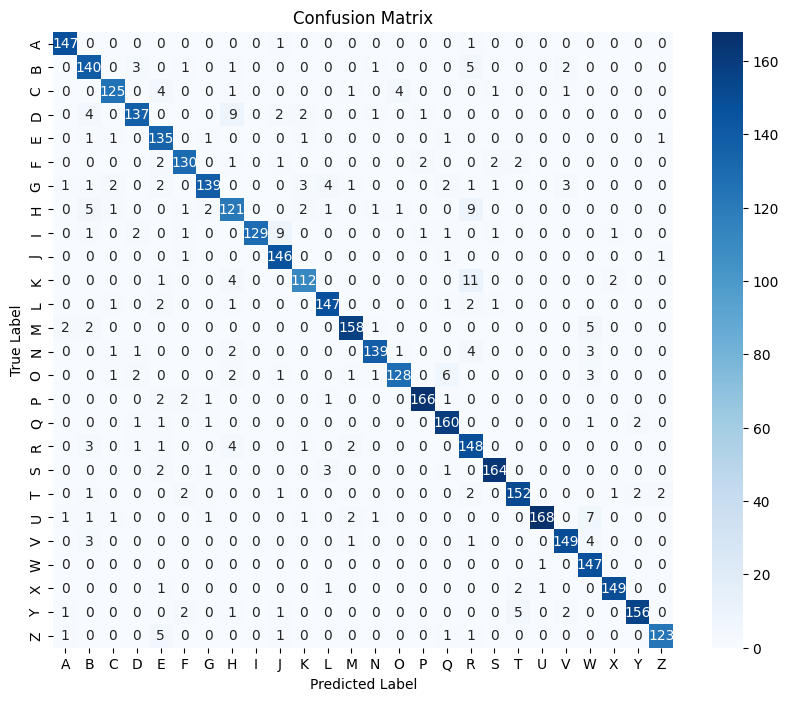

In [30]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Hyperparameter Tuning

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
def create_model(optimizer='adam', activation='relu', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
#List of hyperparameters to try
optimizers = ['adam', 'sgd']
activations = ['relu', 'tanh']
neurons_list = [32, 64, 128]
batch_sizes = [16, 32]
epochs = [10, 20]

In [25]:
# Loop over the hyperparameters
best_accuracy = 0
best_params = {}
for optimizer in optimizers:
    for activation in activations:
        for neurons in neurons_list:
            for batch_size in batch_sizes:
                for epoch in epochs:
                    model = create_model(optimizer=optimizer, activation=activation, neurons=neurons)
                    early_stopping = EarlyStopping(monitor='val_loss', patience=3)
                    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epoch, batch_size=batch_size, callbacks=[early_stopping], verbose=0)
                    accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {
                            'optimizer': optimizer,
                            'activation': activation,
                            'neurons': neurons,
                            'batch_size': batch_size,
                            'epochs': epoch
                        }


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
print(f"Best Accuracy: {best_accuracy:.4f} using {best_params}")

Best Accuracy: 0.9567 using {'optimizer': 'adam', 'activation': 'tanh', 'neurons': 128, 'batch_size': 16, 'epochs': 20}
